<a href="https://colab.research.google.com/github/firstChetsadakon/machine-learning/blob/main/ML_good_bad_Backward_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 86.7 MB/s eta 0:00:00
   ━━━━━

In [2]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import pycaret

from pycaret.classification import *

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 100


In [4]:
credit_app = pd.read_csv ('Application_Data.csv')

In [5]:
credit_app.shape

(25128, 21)

In [6]:
credit_app.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


In [7]:
credit_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

In [8]:
credit_app.isnull().sum()

,0
Applicant_ID,0
Applicant_Gender,0
Owned_Car,0
Owned_Realty,0
Total_Children,0
Total_Income,0
Income_Type,0
Education_Type,0
Family_Status,0
Housing_Type,0


In [9]:
credit_app.dtypes

,0
Applicant_ID,int64
Applicant_Gender,object
Owned_Car,int64
Owned_Realty,int64
Total_Children,int64
Total_Income,int64
Income_Type,object
Education_Type,object
Family_Status,object
Housing_Type,object


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in credit_app.select_dtypes(include=['object']).columns:
    credit_app[col] = label_encoder.fit_transform(credit_app[col])

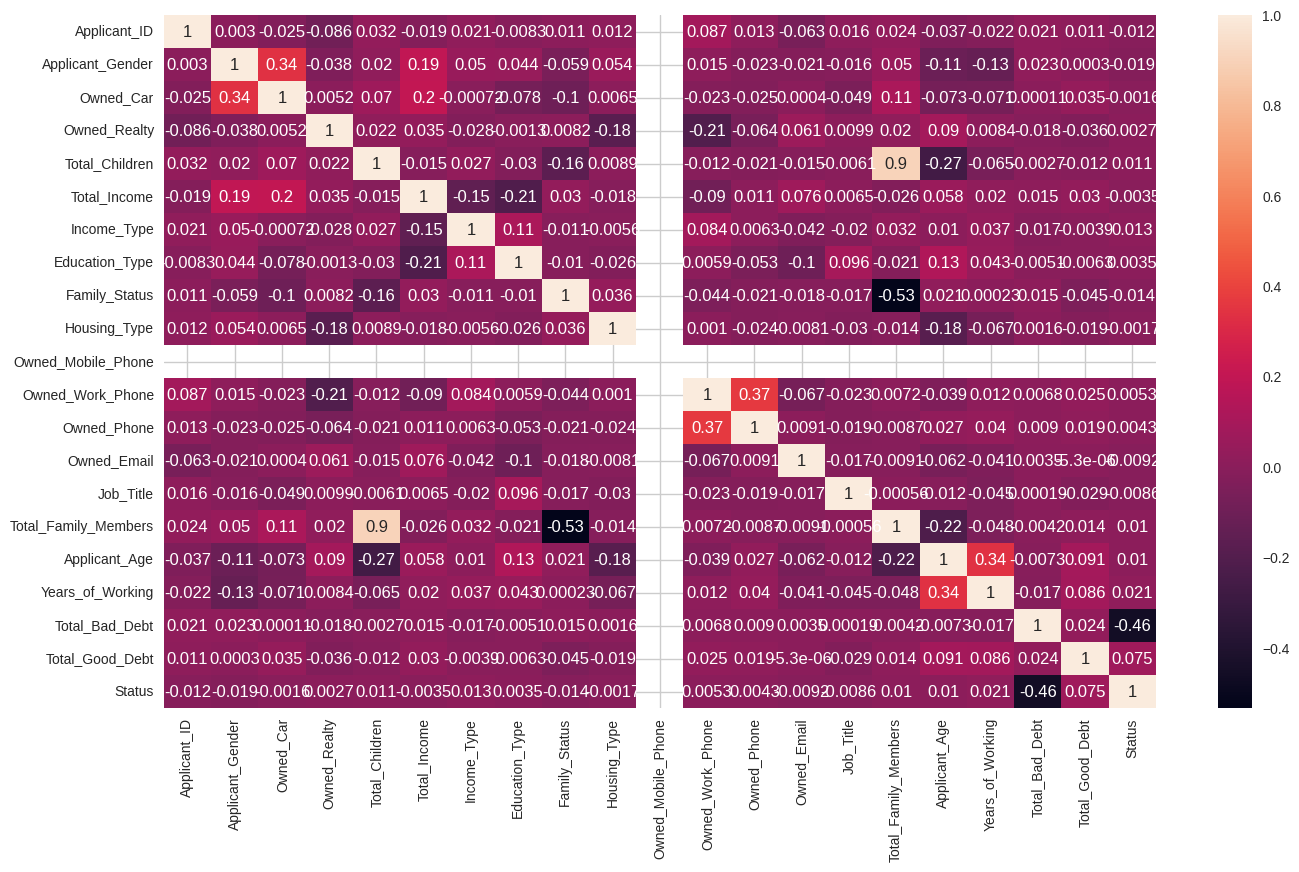

In [11]:
credit_app_numeric = credit_app.select_dtypes(include=[np.number])
plt.figure(figsize=(16,9))
sns.heatmap(credit_app_numeric.corr(), annot=True);

In [12]:
print(credit_app.columns)

Index(['Applicant_ID', 'Applicant_Gender', 'Owned_Car', 'Owned_Realty',
       'Total_Children', 'Total_Income', 'Income_Type', 'Education_Type',
       'Family_Status', 'Housing_Type', 'Owned_Mobile_Phone',
       'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Job_Title',
       'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
       'Total_Bad_Debt', 'Total_Good_Debt', 'Status'],
      dtype='object')


In [13]:
# สนใจ 'Total_Bad_Debt', 'Total_Good_Debt'
# เป็น backward selection
from pycaret.classification import setup

# ตั้งค่าการทำงานใน PyCaret
stp = setup(
    data=credit_app,
    target='Status',
    train_size=0.8,
    categorical_features=[
      'Applicant_Gender', 'Income_Type', 'Family_Status'
    ],
   ignore_features = [
       'Applicant_ID', 'Owned_Car', 'Owned_Realty', 'Total_Income', 'Education_Type', 'Housing_Type',
       'Owned_Mobile_Phone', 'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email',
       'Job_Title'
    ],
    fix_imbalance=True,
    session_id=123,
    feature_selection=True,  # เปิดใช้งาน Feature Selection
    feature_selection_method='classic',  #ใช้วิธีแบบ Backward Selection
    html=True,  # แสดงผลแบบ HTML ตารางการตั้งค่า
    verbose=True  # แสดงรายละเอียดการตั้งค่าใน output
)


[LightGBM] [Info] Number of positive: 20005, number of negative: 20005
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3972
[LightGBM] [Info] Number of data points in the train set: 40010, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Description,Value
0,Session id,123
1,Target,Status
2,Target type,Binary
3,Original data shape,"(25128, 21)"
4,Transformed data shape,"(45036, 2)"
5,Transformed train set shape,"(40010, 2)"
6,Transformed test set shape,"(5026, 2)"
7,Ignore features,11
8,Numeric features,6
9,Categorical features,3


In [14]:
from pycaret.classification import get_config

# ดึงฟีเจอร์ที่ถูกเลือกโดย PyCaret
selected_features = get_config('X').columns
print(selected_features)


Index(['Applicant_Gender', 'Total_Children', 'Income_Type', 'Family_Status',
       'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
       'Total_Bad_Debt', 'Total_Good_Debt'],
      dtype='object')


In [ ]:
# # ของ notebook
# from pycaret.classification import setup

# # ตั้งค่าการทำงานใน PyCaret
# stp = setup(
#     data=credit_app,
#     target='Status',
#     train_size=0.8,
#     categorical_features=[
#         'Applicant_Gender', 'Owned_Car', 'Owned_Realty', 'Income_Type', 'Education_Type',
#         'Family_Status', 'Housing_Type', 'Owned_Mobile_Phone',
#         'Job_Title'
#     ],
#     ignore_features=['Applicant_ID'],
#     fix_imbalance=True,
#     session_id=123,
#     html=True,  # แสดงผลแบบ HTML ตารางการตั้งค่า
#     verbose=True  # แสดงรายละเอียดการตั้งค่าใน output
# )


In [15]:
# --- Using `compare_models()` ---
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9952,0.7173,0.9990,0.9962,0.9976,0.2662,0.2839,0.7000
rf,Random Forest Classifier,0.9544,0.9507,0.9560,0.9982,0.9766,0.1179,0.1998,1.8120
dt,Decision Tree Classifier,0.9476,0.9412,0.9491,0.9982,0.9729,0.1075,0.1883,0.4080
et,Extra Trees Classifier,0.9476,0.9412,0.9491,0.9982,0.9729,0.1075,0.1883,1.1950
lightgbm,Light Gradient Boosting Machine,0.9430,0.9583,0.9440,0.9987,0.9704,0.1193,0.2141,1.8900
xgboost,Extreme Gradient Boosting,0.9369,0.9636,0.9377,0.9988,0.9671,0.1125,0.2098,0.5040
gbc,Gradient Boosting Classifier,0.9363,0.9600,0.9372,0.9987,0.9668,0.1093,0.2050,1.3810
ridge,Ridge Classifier,0.9106,0.9656,0.9118,0.9984,0.9452,0.2558,0.3046,0.6110
lda,Linear Discriminant Analysis,0.9106,0.9656,0.9118,0.9984,0.9452,0.2558,0.3046,0.3900
ada,Ada Boost Classifier,0.9039,0.9671,0.9039,0.9995,0.9487,0.0886,0.2003,0.8860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# --- Print `best_model` ---
print(best_model)

[]


In [ ]:
# --- Using `evaluate_model()` ---
evaluate_model(best_model)